<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PREPROCESSING: Feature Selection**
---

In this tutorial, we will perform feature selection method for preprocessing the 'adult.csv' dataset.

In [1]:
# Installing library
# !pip install category_encoders # Not available in colab

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

# Other libraries
import warnings
warnings.filterwarnings('ignore')

# Customizing with 'ggplot' style
plt.style.use('ggplot')

# Load Dataset

In [3]:
# Loading dataset 'adult.csv'
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/adult.csv'
df = pd.read_csv(url)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Replacing the target into numerical categories (<=500 k as 0 and > 500 k as 1)
df['income'] = np.where(df['income']=='<=50K', 0, 1)

In [5]:
# Data dimension
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
# Statistical descriptive
df.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,0.240810
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,0.427581
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [7]:
# Summarizing data
# Initial assessment
# Displaying maximum view
pd.set_option('display.max_colwidth', None)

# Check data types, missing values, negative values, unique values for each column
assessment_data = pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'missing_value_sum': df.isna().sum(),
    'missing_value_pct': round((df.isna().sum() / len(df)) * 100, 2),
    'negative_value': [(df[col] < 0).any() if df[col].dtype in ['int64', 'float64'] else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

assessment_data

,feature,data_type,missing_value_sum,missing_value_pct,negative_value,n_unique,sample_unique
age,age,int64,0,0.0,False,73,"[90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37, 29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40, 50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81, 65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79, 88, 84, 85, 86, 87]"
workclass,workclass,object,0,0.0,False,9,"[?, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked]"
fnlwgt,fnlwgt,int64,0,0.0,False,21648,"[77053, 132870, 186061, 140359, 264663, 216864, 150601, 88638, 422013, 70037, 172274, 164526, 129177, 136204, 172175, 45363, 172822, 317847, 119592, 203034, 188774, 77009, 29059, 153870, 135285, 34310, 228696, 122066, 107164, 175360, 44064, 107287, 198863, 123011, 205246, 39181, 149650, 197163, 137527, 161691, 326232, 115806, 115066, 289669, 100820, 121253, 110380, 233882, 192052, 174995, 335549, 237729, 68898, 107276, 141584, 207668, 313243, 147372, 237608, 194901, 155106, 121441, 162028, 160724, 132222, 226355, 329980, 124137, 187702, 199029, 145290, 297248, 227856, 179731, 154374, 27187, 326857, 160369, 396745, 151089, 336188, 279015, 43221, 30529, 201742, 218490, 156996, 298449, 191712, 198654, 102308, 348521, 56248, 252752, 192963, 198759, 143123, 237713, 81929, 167793, ...]"
education,education,object,0,0.0,False,16,"[HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool]"
education.num,education.num,int64,0,0.0,False,16,"[9, 10, 4, 6, 16, 15, 13, 14, 7, 12, 11, 2, 3, 8, 5, 1]"
marital.status,marital.status,object,0,0.0,False,7,"[Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse]"
occupation,occupation,object,0,0.0,False,15,"[?, Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]"
relationship,relationship,object,0,0.0,False,6,"[Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife]"
race,race,object,0,0.0,False,5,"[White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo]"
sex,sex,object,0,0.0,False,2,"[Female, Male]"


### Missing Values

In [8]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
# Replacing '?' with NaN
df = df.replace(to_replace='?', value=np.nan)
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0


In [10]:
# Displaying missing values
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


### Duplicates

In [11]:
# Displaying duplicates and sorting based on the column 'fnlwgt'
df[df.duplicated(keep=False)].sort_values(['fnlwgt'])

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
29334,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
26531,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
11121,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
23276,49,Private,31267,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
23827,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
10357,49,Self-emp-not-inc,43479,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
6227,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
19622,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0


In [12]:
# Total number of duplicates
df.duplicated().sum()

np.int64(24)

In [13]:
df.shape

(32561, 15)

In [14]:
df = df.drop_duplicates()
df.shape

(32537, 15)

### Outliers

In [15]:
# Placing all columns into a list
num_features = list(df.describe().columns)
num_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'income']

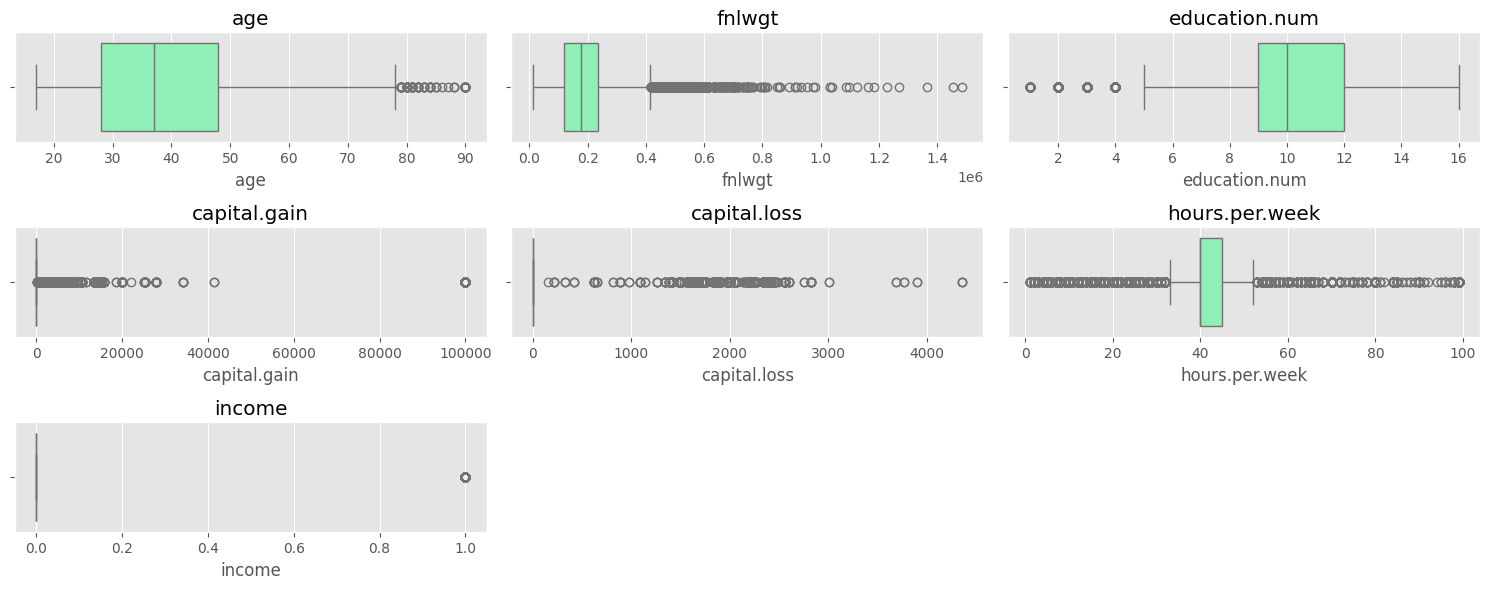

In [16]:
# Displaying outliers
plot_number = 1
plt.figure(figsize=(15,6))

for feat in num_features:

    plt.subplot(3,3,plot_number)
    sns.boxplot(data=df, x=feat, palette='rainbow')
    plt.title(feat)
    plt.tight_layout()

    plot_number = plot_number+1

In [17]:
# df.groupby(['education.num', 'education']).count().index

In [18]:
# Before dropping outliers
df.shape

(32537, 15)

In [19]:
# drop outliers education.num
df = df[~(df['education.num'] < 4)]
df.shape

(31989, 15)

In [20]:
# drop outliers capital.gain
df = df[~(df['capital.gain'] > 20000)]
df.shape

(31737, 15)

In [21]:
# drop outliers capital.loss
df = df[~(df['capital.loss'] > 3000)]
df.shape

(31726, 15)

## EDA

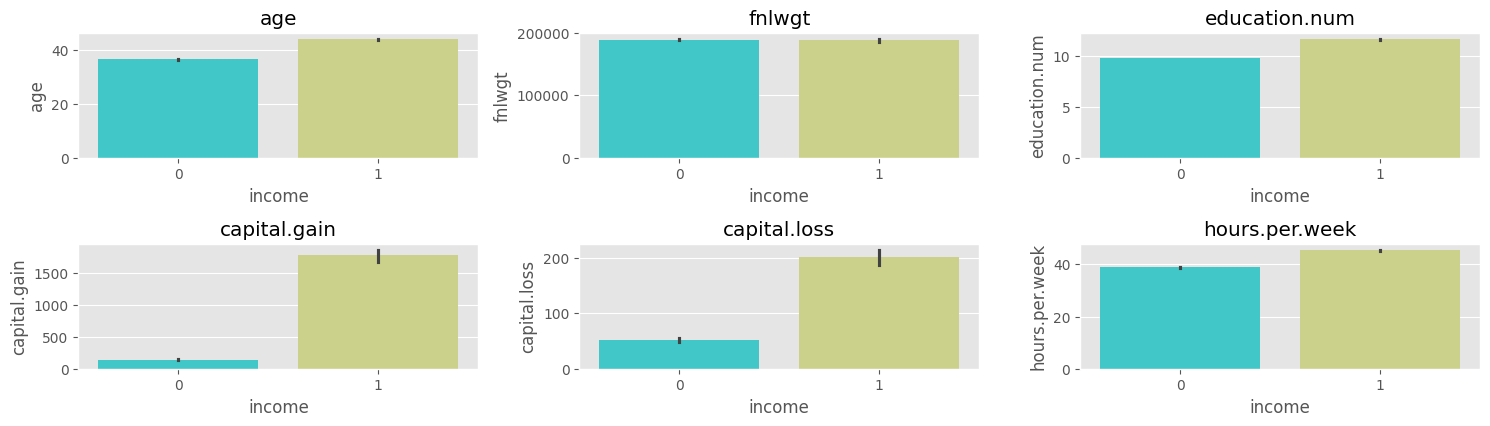

In [22]:
# target vs numerical features

plot_number = 1
plt.figure(figsize=(15,6))

for feat in num_features[:-1]:

    plt.subplot(3,3,plot_number)
    sns.barplot(data=df, x='income', y=feat, palette='rainbow')
    plt.title(feat)
    plt.tight_layout()

    plot_number = plot_number+1

## Define X y

In [23]:
# Defining target and features
X = df.drop(columns=['income', 'fnlwgt', 'education'])
y = df['income']

## Data Splitting

In [24]:
# Data splitting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Preprocessing

Impute Missing Values:
- Mode: workclass, occupation, native.country

Encoding:
- onehot: workclass, marital.status, relationship, race, sex
- binary: occupation, native.country

Scaling:
- Robust: 'age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'

In [25]:
# Creating pipeline for preprocessing

# pipeline mode + onehot
pipe_mode_onehot = Pipeline([
    ('imp_mode', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# pipeline mode + binary
pipe_mode_binary = Pipeline([
    ('imp_mode', SimpleImputer(strategy='most_frequent')),
    ('binary', BinaryEncoder())
])

In [26]:
# Creating transformer for preprocessing
transformer = ColumnTransformer([
    ('pipe_mode_onehot', pipe_mode_onehot, ['workclass', 'marital.status', 'relationship', 'race', 'sex']),
    ('pipe_mode_binary', pipe_mode_binary, ['occupation', 'native.country']),
    ('scaler', RobustScaler(), ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'])
], remainder='passthrough')

In [27]:
# Fitting and predicting

# fit
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

**Displaying in the dataframe format**

In [28]:
feat_onehot = transformer.transformers_[0][1].get_feature_names_out()

In [29]:
feat_binary = transformer.transformers_[1][1][1].get_feature_names()

In [30]:
feat_robust = transformer.transformers_[2][2]

In [31]:
all_feat = list(feat_onehot) + list(feat_binary) + list(feat_robust)
len(all_feat)

43

In [32]:
X_train_prep_df = pd.DataFrame(data=X_train_prep, columns=all_feat)
X_test_prep_df = pd.DataFrame(data=X_test_prep, columns=all_feat)

X_train_prep_df.head(3)

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,...,1_1,1_2,1_3,1_4,1_5,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.45,0.000000,0.0,0.0,0.4
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.90,-0.333333,0.0,0.0,-4.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.20,1.000000,0.0,0.0,0.0


## Feature Selection: Univariate Statistics (filter method)


Selecting feature before modelling using statistical testing

In [33]:
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [34]:
X_train_prep_df.shape

(25380, 43)

In [35]:
# define function
select = SelectKBest(k=10) # Selecting the top 10 statistically significant features

# fit
select.fit(X_train_prep_df, y_train)

# transform
X_train_select = select.transform(X_train_prep_df)
X_test_select = select.transform(X_test_prep_df)

In [36]:
X_train_select.shape # 10 remaining features

(25380, 10)

In [37]:
# 10 selected features # for modelling
select.get_feature_names_out()

array(['marital.status_Married-civ-spouse',
       'marital.status_Never-married', 'relationship_Husband',
       'relationship_Own-child', 'sex_Female', 'sex_Male', 'age',
       'education.num', 'capital.gain', 'hours.per.week'], dtype=object)

In [38]:
df_select = pd.DataFrame()
df_select['feature'] = X_test_prep_df.columns
df_select['is_selected'] = select.get_support()

df_select

,feature,is_selected
0,workclass_Federal-gov,False
1,workclass_Local-gov,False
2,workclass_Never-worked,False
3,workclass_Private,False
4,workclass_Self-emp-inc,False
5,workclass_Self-emp-not-inc,False
6,workclass_State-gov,False
7,workclass_Without-pay,False
8,marital.status_Divorced,False
9,marital.status_Married-AF-spouse,False


## Modeling

**Using 43 features**

In [39]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_prep_df, y_train)

y_pred_43 = model.predict(X_test_prep_df)
accuracy_score(y_test, y_pred_43)

0.8140560983296565

**Using 10 features**

In [40]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_select, y_train)

y_pred_select = model.predict(X_test_select)
accuracy_score(y_test, y_pred_select)

0.8167349511503309

Insight: The use of 10 features (after univariate statistic feature selection) can compete and even produce slightly better performance than the 43 features.